In [2]:
import numpy as np
import matplotlib.pyplot as pt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D, proj3d

#### Ackley Function
The Ackley function is widely used for testing optimization algorithms. In its two-dimensional form, as shown in the plot below, it is characterized by a nearly flat outer region, and a large hole at the centre. The function poses a risk for optimization algorithms, particularly hillclimbing algorithms, to be trapped in one of its many local minima

In [3]:
def ackley_func_2_dimension(a, b, c, d):
        def ackley(X,Y):
                sum_sq_term = -a * np.exp(-b * np.sqrt((X*X + Y*Y)/2) )
                cos_term = -np.exp((np.cos(c*X) + np.cos(c*Y)) / 2)
                Z = a + np.exp(1) + sum_sq_term + cos_term
                return Z
        return ackley
   

#### Ackley Function in 2 dimensions with recommended Variable values

a=20,
b=0.2,
c=2π

In [4]:
ackley_2d=ackley_func_2_dimension(20,0.2,2*np.pi,2)

#### Plotting Ackley function

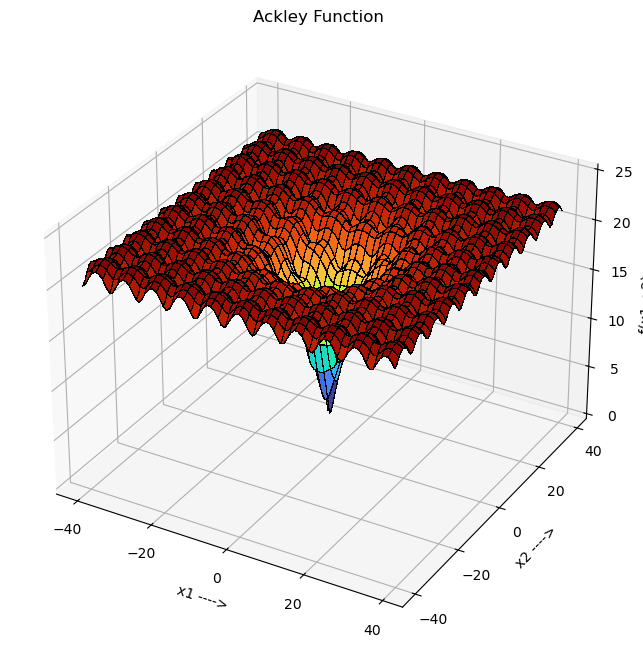

In [5]:
# Create a grid of points with points closer in range -5 to 5
# x1 = np.arange(-4, 4, 0.76)
# y1 = np.arange(-4, 4, 0.76)

# # Create a grid of points with points farther in range -40 to -5 and 5 to 40
# x2 = np.arange(-40, -4, 0.88)
# y2 = np.arange(-40, -4, 0.88)

# x3 = np.arange(4, 40, 0.88)
# y3 = np.arange(4, 40, 0.88)


# # Concatenate the grids
# x = np.concatenate((x2, x1, x3), axis=0)
# y = np.concatenate((y2, y1, y3), axis=0)
x=np.arange(-40,40,0.88)
y=np.arange(-40,40,0.88)
X,Y=np.meshgrid(x,y)
Z=ackley_2d(X,Y)


# Plot the surface
fig = pt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap="turbo",edgecolor='k',linewidth=0.1, antialiased=False)


ax.set_xlabel('x1 ---->')
ax.set_ylabel('x2 ---->')
ax.set_zlabel('f(x1, x2) ---->')
ax.set_title('Ackley Function')

# Set x and y ticks
ax.set_xticks([-40, -20, 0, 20, 40])
ax.set_yticks([-40, -20, 0, 20, 40])

# Set grid
ax.set_zlim(0, 25)

# Set grid to dotted
ax.grid(True)

pt.show()

#### Contour Plot of Ackley Function

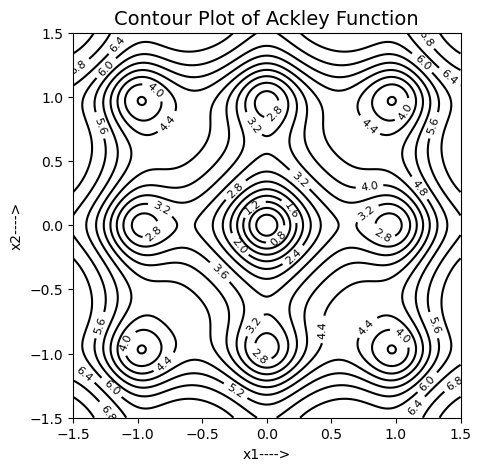

In [6]:
# Define the range of x and y values
x = np.linspace(-1.5, 1.5, 380)
y = np.linspace(-1.5, 1.5, 450)

# Create a grid of x and y values
X, Y = np.meshgrid(x, y)

# Calculate the Ackley function values for each point in the grid
Z = ackley_2d(X, Y)

# Plot the contour plot with increased density of lines
pt.figure(figsize=(5, 5))
contour = pt.contour(X, Y, Z, levels=23, colors="Black")  # Set the number of levels to increase density
pt.xlabel('x1---->')
pt.ylabel('x2---->')
pt.title('Contour Plot of Ackley Function',size=14)
pt.clabel(contour, inline=True, fontsize=8)
pt.show()

#### Defining Numerical Gradient Function

In [7]:
def numericalGrad(funObj,w,epsilon):
    m=w.shape
    grad=np.zeros(m)
    for i in range(m[0]):
        wp=np.copy(w)
        wn=np.copy(w)
        wp[i] = w[i] + epsilon
        wn[i] = w[i] - epsilon
        grad[i] = (funObj(wp[0],wp[1])-funObj(wn[0],wn[1]))/(2*epsilon)
    return grad

#### Gradient Descent Function

In [16]:
def Gradient_Descent(f, x, alpha, steps=50):
    count = 0
    tolerance = 1e-7 * np.ones(x.shape)
    x_k = np.array([x])  # Initialize with x as the first element
    while count < steps:
        gradient = numericalGrad(f,x_k[-1], 0.00001)  # Compute gradient at the last element of x_k
        x_k_1 = x_k[-1] - alpha * gradient
        x_k = np.concatenate((x_k, [x_k_1]),axis=0)  # Append the new point to x_k
        if np.linalg.norm(x_k_1 - x_k[-2]) < np.linalg.norm(tolerance):
            break
        count += 1    
    return x_k


#### Experimenting Gradient Descent Function with fixed Alphas and different Initialization

In [17]:
start_points=np.array([[0.61,0.72],[0.61,0.72],[0.61,0.73],[0.62,0.75]])
alphas=[0.05,0.01,0.01,0.01]
gds=[]
for i in range(4):
    gds.append(Gradient_Descent(ackley_2d,start_points[i],alphas[i]))

#### Plotting Gradient Descent trajectories and Ackley Values over Steps

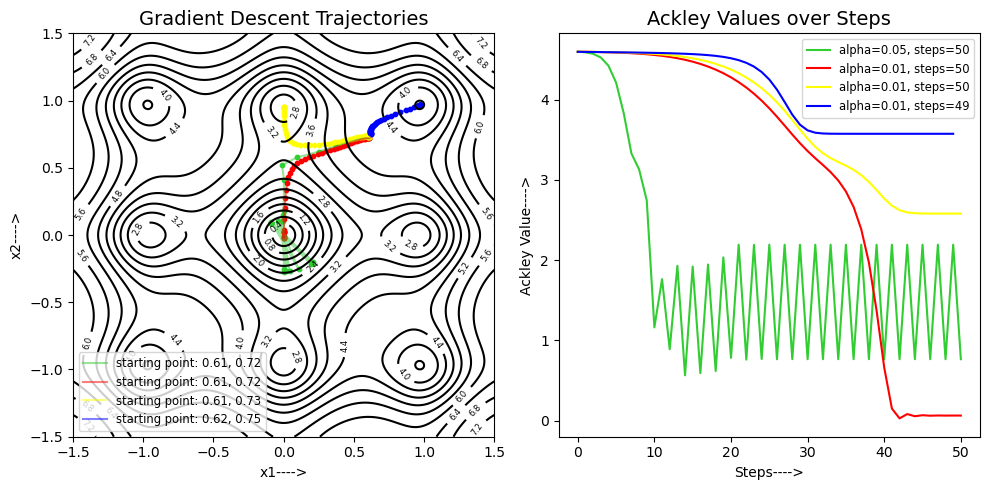

In [18]:
# Define the range of x and y values
x = np.linspace(-1.5, 1.5, 380)
y = np.linspace(-1.5, 1.5, 450)

# Create a grid of x and y values
X, Y = np.meshgrid(x, y)

# Calculate the Ackley function values for each point in the grid
Z = ackley_2d(X, Y)

# Create subplots
fig, ax = pt.subplots(1, 2, figsize=(10, 5))

colors = ["limegreen", "red", "yellow", "blue"]
for i in range(4):
    ax[0].scatter(gds[i][:, 0], gds[i][:, 1], color=colors[i], s=10, marker='o')
    ax[0].plot(gds[i][:, 0], gds[i][:, 1], colors[i], label=f"starting point: {gds[i][0, 0]}, {gds[i][0, 1]}", alpha=0.5)
    z = ackley_2d(gds[i][:, 0], gds[i][:, 1])
    ax[1].plot(range(gds[i][:, 0].shape[0]), z,color=colors[i], label=f"alpha={alphas[i]}, steps={gds[i][:, 0].shape[0]-1}")

# Customize the plots
ax[0].set_xlabel('x1---->')
ax[0].set_ylabel('x2---->')
ax[0].legend(fontsize='small',loc="lower left")
ax[0].set_title('Gradient Descent Trajectories',size=14)

ax[1].set_xlabel('Steps---->')
ax[1].set_ylabel('Ackley Value---->')
ax[1].legend(fontsize='small',loc="upper right")
ax[1].set_title('Ackley Values over Steps',size=14)

# Plot the contour plot
contour = ax[0].contour(X, Y, Z, levels=20, colors="black")
ax[0].clabel(contour, inline=True, fontsize=6, fmt='%.1f', colors='black')

# Show the plots
pt.tight_layout()
pt.show()

#### Gradient Descent with Backtracking

In [11]:
def back_tracking(f,x_k,d_k,c1,rho):
    alpha=0.2 #adjusting hyperparameter according to the problem
    x_k_1=x_k+alpha*d_k
    while(f(x_k_1[0],x_k_1[1])>(f(x_k[0],x_k[1])-c1*(alpha)*np.dot(d_k,d_k))):
        alpha=rho*alpha
        x_k_1=x_k+alpha*d_k
    return alpha

In [19]:
def grad_descent_backtracking(f, x,c1,rho, steps=50):
    count = 0
    tolerance = 1e-7 * np.ones(x.shape)
    x_k = np.array([x])  # Initialize with x as the first element
    while count < steps:
        d_k = -1*numericalGrad(f,x_k[-1], 0.0001) 
        alpha=back_tracking(f,x_k[-1],d_k,c1,rho)
        x_k_1 = x_k[-1] + alpha * d_k
        x_k = np.concatenate((x_k, [x_k_1]),axis=0)  # Append the new point to x_k
        if np.linalg.norm(x_k_1 - x_k[-2]) < np.linalg.norm(tolerance):
            break
        count += 1    
    return x_k

In [20]:
gd_backtrack=grad_descent_backtracking(ackley_2d,start_points[3],0.25,0.1,80)
gd_backtrack.shape

(12, 2)

In [24]:
#for slider for c1 and ⍴ values
from ipywidgets import interactive, FloatSlider
import ipywidgets as widgets


def visualize_gradient_descent(c1, rho):
    # Create subplots
    fig, ax = pt.subplots(1, 2, figsize=(10, 5))

    colors = ["red", "limegreen", "blue"]
    for k in range(3):
        gd_backtrack = grad_descent_backtracking(ackley_2d, start_points[k+1], c1, rho) #claculate path for gradient descent with backtracking
        ax[0].scatter(gd_backtrack[:,0], gd_backtrack[:,1], color=colors[k], s=10, marker='o')
        ax[0].plot(gd_backtrack[:, 0], gd_backtrack[:, 1], color=colors[k], label=f"starting point: {gd_backtrack[0, 0]}, {gd_backtrack[0, 1]}")
        z = ackley_2d(gd_backtrack[:, 0], gd_backtrack[:, 1])
        ax[1].plot(range(gd_backtrack[:, 0].shape[0]), z, color=colors[k], label=f" C₁={c1:.2f}, ⍴={rho:.2f}, steps={gd_backtrack[:, 0].shape[0]-1}")
        
    # Customize the plots
    ax[0].set_xlabel('x1---->')
    ax[0].set_ylabel('x2---->')
    ax[0].legend(fontsize='small', loc="lower left")
    ax[0].set_title(f'Gradient Descent with Backtracking C₁={c1:.2f}, ⍴={rho:.2f}', size=12)

    ax[1].set_xlabel('Steps---->')
    ax[1].set_ylabel('Ackley Value---->')
    ax[1].legend(fontsize='small', loc="upper right")
    ax[1].set_title('Ackley Values over Steps', size=12)
    x = np.linspace(-1.5, 1.5, 380)
    y = np.linspace(-1.5, 1.5, 450)

    # Create a grid of x and y values
    X, Y = np.meshgrid(x, y)

    # Calculate the Ackley function values for each point in the grid
    Z = ackley_2d(X, Y)
    # Plot the contour plot
    contour = ax[0].contour(X, Y, Z, levels=20, colors="black")
    ax[0].clabel(contour, inline=True, fontsize=6, fmt='%.1f', colors='black')

    # Show the plots
    pt.tight_layout()
    pt.show()

# Create interactive widgets for c1 and rho
c1_slider = FloatSlider(value=0.1, min=0.1, max=0.8, step=0.01, description='C₁:')
rho_slider = FloatSlider(value=0.1, min=0.1, max=0.8, step=0.01, description='⍴:')

# Create the interactive plot
interactive_plot = interactive(visualize_gradient_descent, c1=c1_slider, rho=rho_slider)
interactive_plot


interactive(children=(FloatSlider(value=0.1, description='C₁:', max=0.8, min=0.1, step=0.01), FloatSlider(valu…

#### In case of Gradient Descent with BackTracking it will converge much faster(in less steps) compare to Gradient descent with fixed ⍺ but the issue of converging to local minima instead of global minima still exists as it is also first order method only